In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.simplefilter(action="ignore")

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

In [3]:
fetal_health=pd.read_csv("fetal_health.csv")
fetal_health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
fetal_health.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


## EDA analysis

In [5]:
fetal_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
fetal_health.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [7]:
fetal_health.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [8]:
fetal_health.shape

(2126, 22)

In [9]:
fetal_health.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


### Analyze and visualize the target columns

In [10]:
fetal_health["fetal_health"].describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

In [11]:
print(fetal_health["fetal_health"].value_counts())

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


In [12]:
## Multiclassification problem
 ###1. Normal
 ###2. Suspect
 ###3. Pathological

In [13]:
print(fetal_health["fetal_health"].value_counts())

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


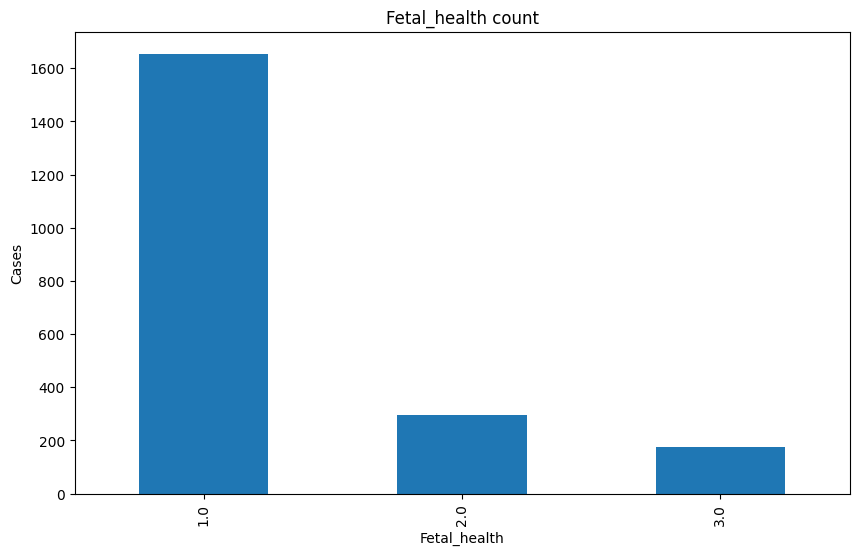

In [14]:
vis_fetal_health=fetal_health.fetal_health.value_counts().plot(figsize=(10,6),kind="bar")
plt.title("Fetal_health count")
plt.xlabel("Fetal_health")
plt.ylabel("Cases")
plt.show()

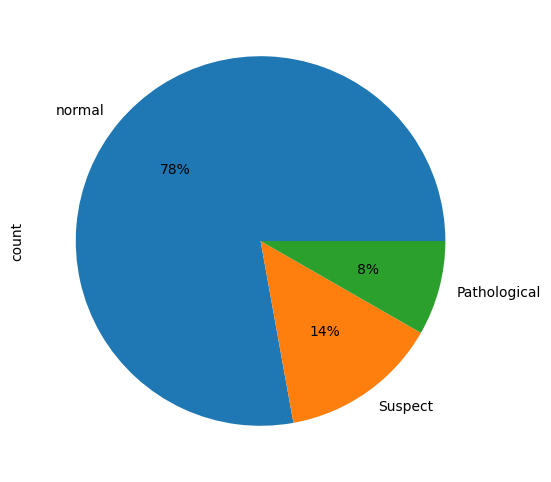

In [15]:
vis_fetal_health=fetal_health.fetal_health.value_counts().plot(figsize=(10,6),kind="pie",autopct="%1.0f%%",labels=["normal","Suspect","Pathological"])

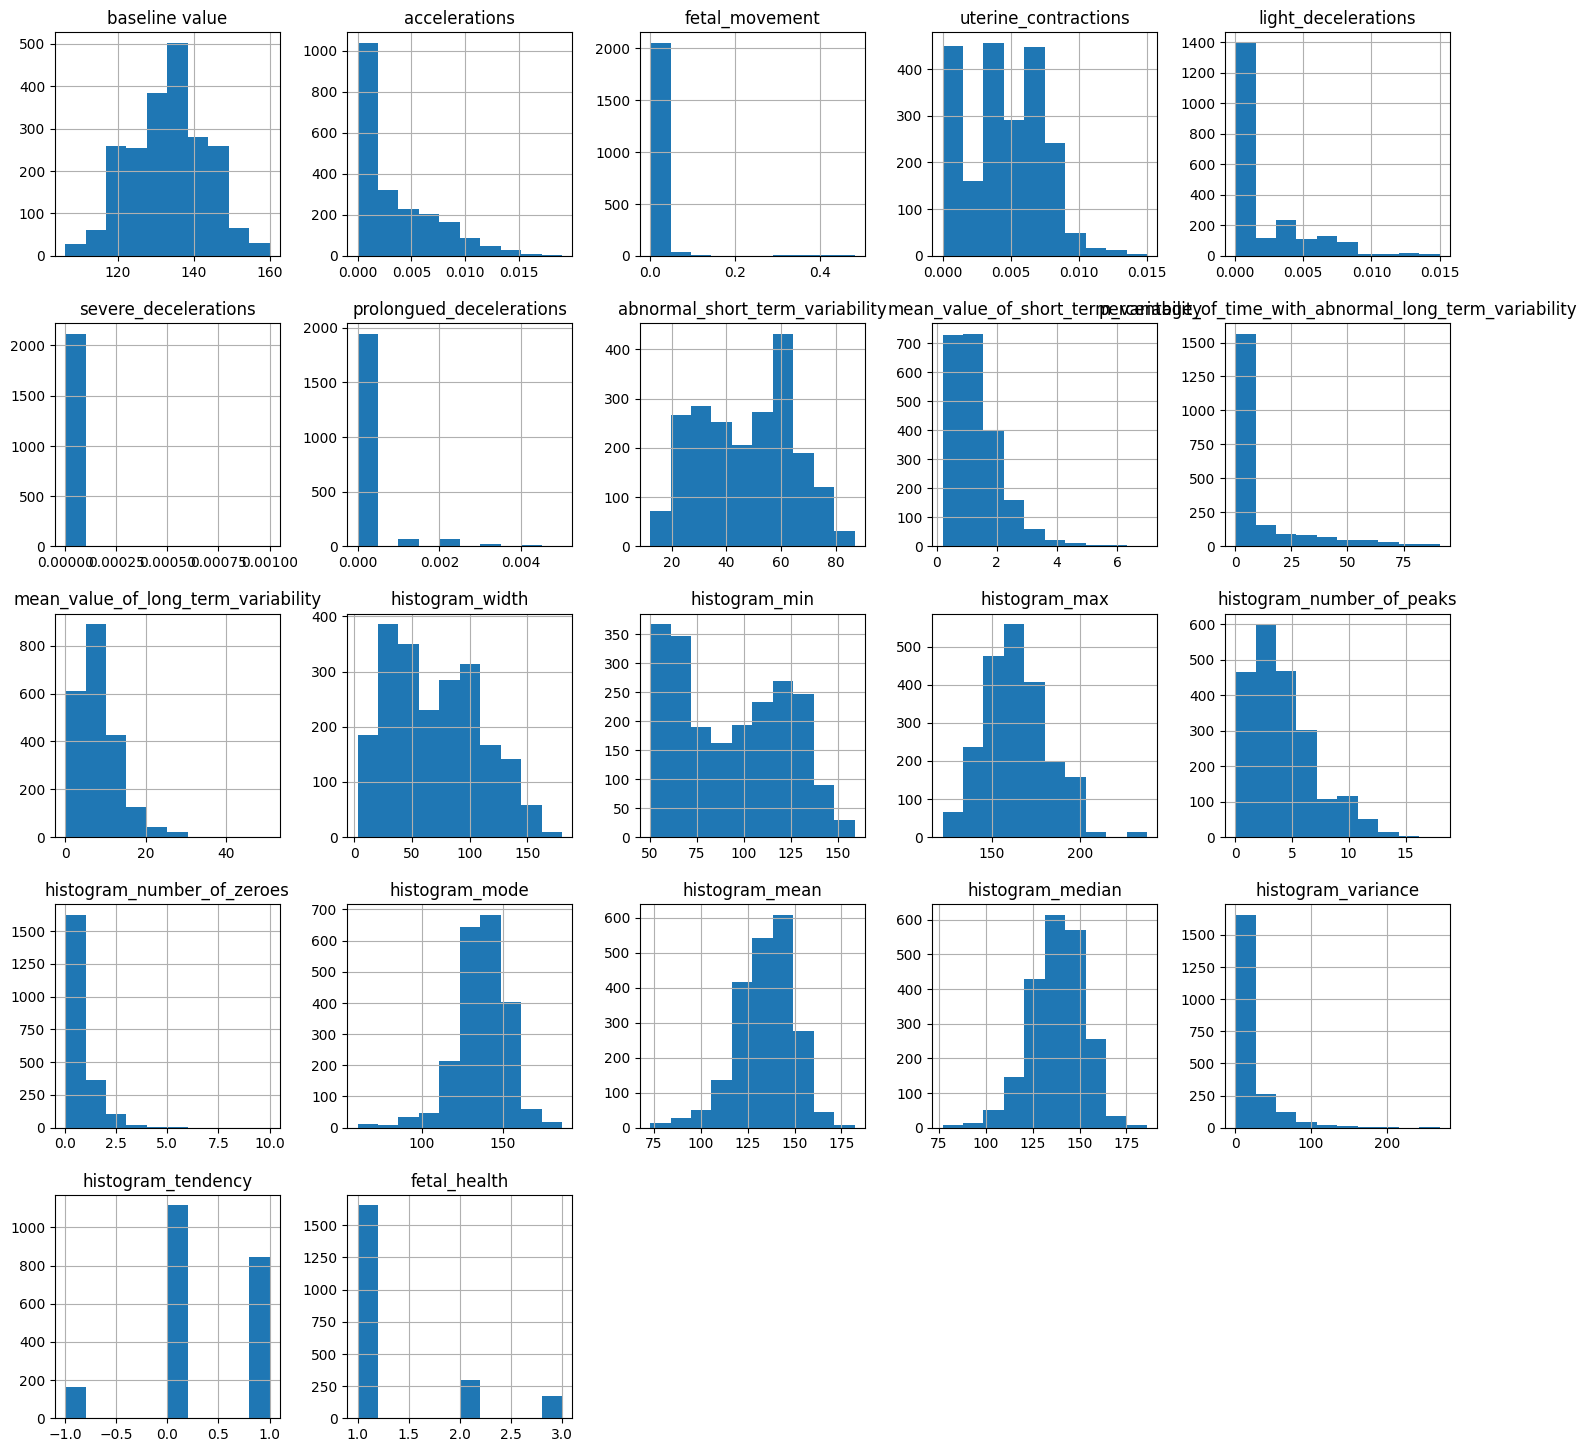

In [16]:
vis_hist_plot=fetal_health.hist(figsize=(18,18))

In [17]:
numeric_data=fetal_health.select_dtypes(exclude="object")
corr_matrix=numeric_data.corr()
corr_matrix

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


<Axes: >

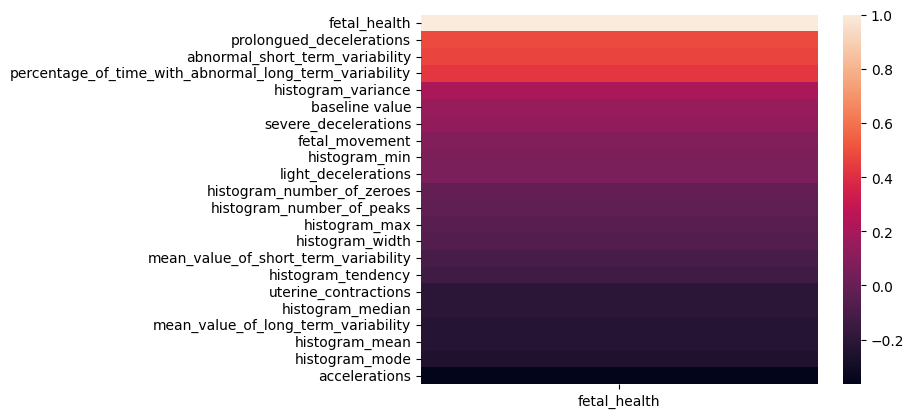

In [18]:
Num_feature=corr_matrix["fetal_health"].sort_values(ascending=False).head(30).to_frame()
cm=sns.heatmap(Num_feature)
cm

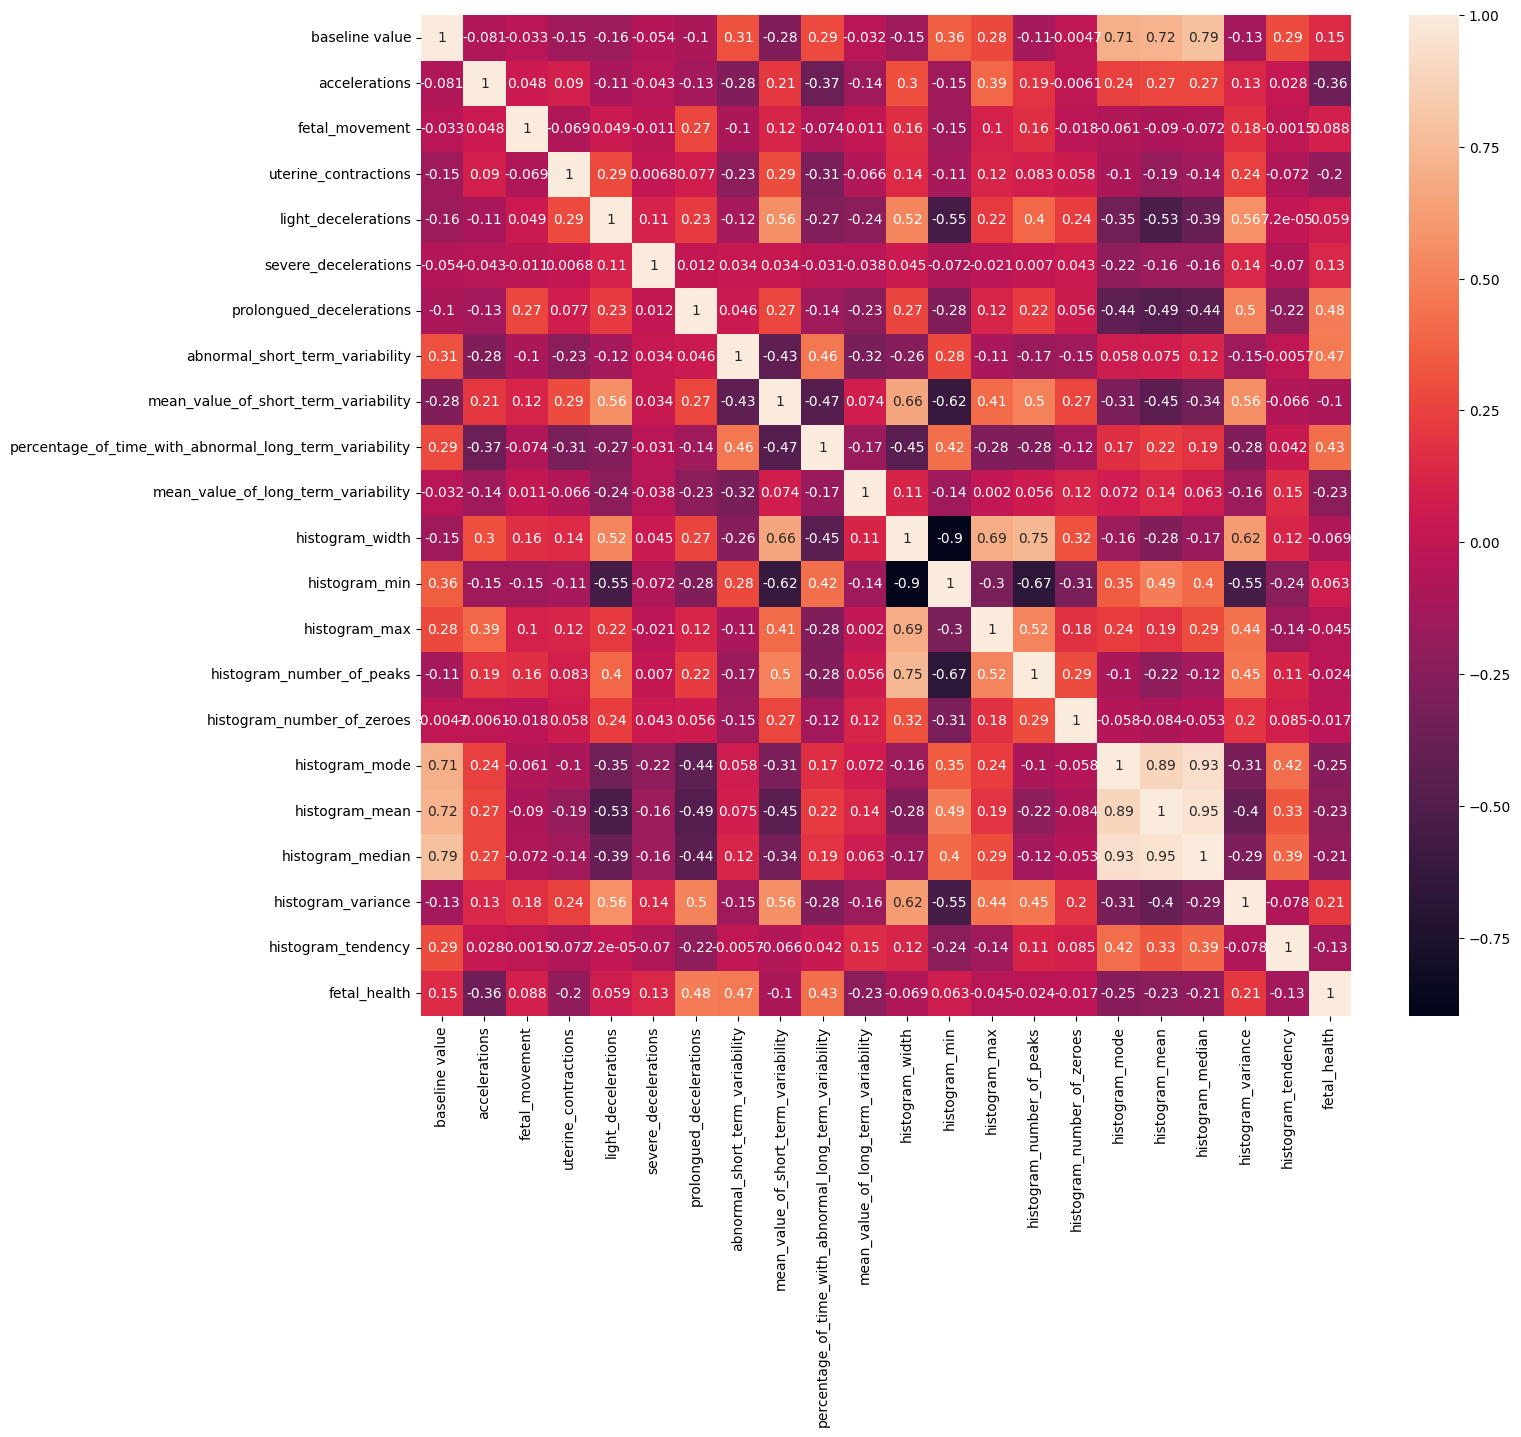

In [19]:
plt.figure(figsize=(15,13))
p=sns.heatmap(corr_matrix,annot=True)

## Scaling Data

In [20]:
columns=['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X=StandardScaler()
X=pd.DataFrame(scale_X.fit_transform(fetal_health.drop(["fetal_health"],axis=1),),columns=columns)

In [21]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


In [22]:
Y=fetal_health["fetal_health"]
Y.head()

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: fetal_health, dtype: float64

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [24]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1488, 21), (638, 21), (1488,), (638,))

### Building models
 ##### 1.Logistic Regression(LR)
 ##### 2.K-nearest neighbors(KNN)
 ##### 3.Random Forest(RF)
 ##### 4.Gradient Boosting Macchine(GBM)

In [25]:
log_reg_model=LogisticRegression()

In [26]:
log_reg_model.fit(X_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
Y_pred_lr=log_reg_model.predict(X_test)

In [28]:
accuracy=accuracy_score(Y_test,Y_pred_lr)*100
print(f"Accuracy of Logistic Regression={round(accuracy,2)}%")

Accuracy of Logistic Regression=87.93%


### Cross Validation

In [29]:
cv_method=StratifiedKFold(n_splits=3)

In [30]:
cv_score=cross_val_score(log_reg_model,
                         X_train,Y_train,
                         cv=cv_method,
                         n_jobs=2,
                         scoring="accuracy")
print(f"Scores(Cross validate)for Logistic Regression model:\n{cv_score}")
print(f"CrossValMeans:{round(cv_score.mean(),3)*100} %")
print(f"CrossValStandard Deviation:{round(cv_score.std(),3)}")

Scores(Cross validate)for Logistic Regression model:
[0.89112903 0.90725806 0.89314516]
CrossValMeans:89.7 %
CrossValStandard Deviation:0.007


## Hyperparameter tunning

In [31]:
params_LR={"tol":[0.0001,0.0002,0.0003],
           "C":[0.01,0.1,1,10,100],
           "intercept_scaling":[1,2,3,4]}

In [32]:
GridSearchCV_LR=GridSearchCV(estimator=log_reg_model,
                            param_grid=params_LR,cv=cv_method,
                            verbose=1,n_jobs=3,
                            scoring="accuracy",return_train_score=True)

In [33]:
GridSearchCV_LR.fit(X_train,Y_train);

Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [34]:
best_estimator_LR=GridSearchCV_LR.best_estimator_
print(f"Best parameter values for LR model:\n{best_estimator_LR}")

Best parameter values for LR model:
LogisticRegression(C=1)


In [35]:
best_params_LR=GridSearchCV_LR.best_params_
print(f"Best parameter values for LR model:\n{best_params_LR}")

Best parameter values for LR model:
{'C': 1, 'intercept_scaling': 1, 'tol': 0.0001}


In [36]:
print(f"Best score for LR model:{round(GridSearchCV_LR.best_score_,3)*100}%")

Best score for LR model:89.7%


### Model performance Analysis

In [37]:
print("Classification Report")
print(classification_report(Y_test,Y_pred_lr))

Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       496
         2.0       0.67      0.62      0.65       101
         3.0       0.65      0.80      0.72        41

    accuracy                           0.88       638
   macro avg       0.75      0.79      0.77       638
weighted avg       0.88      0.88      0.88       638



In [38]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred_lr))

Confusion Matrix
[[465  26   5]
 [ 25  63  13]
 [  3   5  33]]


## K-Nearest Neighbors(KNN)

In [39]:
knn=KNeighborsClassifier()
knn_mod=knn.fit(X_train,Y_train)
print(f"Baseline K-Nearest Neighbors: {round(knn_mod.score(X_test,Y_test),3)*100}%")
Y_pred_knn=knn_mod.predict(X_test)

Baseline K-Nearest Neighbors: 90.9%


In [40]:
## cross validation 
cv_method=StratifiedKFold(n_splits=3)
scores_knn=cross_val_score(knn,
                         X_train,Y_train,
                         cv=cv_method,
                         n_jobs=2,
                         scoring="accuracy")
print(f"Scores(Cross validate)for K-Nearest Neighbors model:\n{scores_knn}")
print(f"CrossValMeans:{round(scores_knn.mean(),3)*100} %")
print(f"CrossValStandard Deviation:{round(scores_knn.std(),3)}")

Scores(Cross validate)for K-Nearest Neighbors model:
[0.89919355 0.89717742 0.89516129]
CrossValMeans:89.7 %
CrossValStandard Deviation:0.002


In [41]:
## hyper parameter tunning
params_knn={"leaf_size":[10,20,30],
          "n_neighbors":[3,5,7,9],
           "p":[1,2]}

In [42]:
GridSearchCV_knn=GridSearchCV(estimator=KNeighborsClassifier(),
                            param_grid=params_knn,
                            cv=cv_method,
                            verbose=1,
                            n_jobs=-1,
                            scoring="accuracy",
                            return_train_score=True)

In [43]:
GridSearchCV_knn.fit(X_train,Y_train);

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [44]:
best_estimator_knn=GridSearchCV_knn.best_estimator_
print(f"Best parameter values for GNB model:\n{best_estimator_knn}")

Best parameter values for GNB model:
KNeighborsClassifier(leaf_size=10, n_neighbors=3, p=1)


In [45]:
best_params_knn=GridSearchCV_knn.best_params_
print(f"Best parameter values for GNB model:\n{best_params_knn}")

Best parameter values for GNB model:
{'leaf_size': 10, 'n_neighbors': 3, 'p': 1}


In [46]:
print(f"Best score for GNB model:{round(GridSearchCV_knn.best_score_,3)*100}%")

Best score for GNB model:90.5%


In [47]:
print("Classification Report")
print(classification_report(Y_test,Y_pred_knn))

Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       496
         2.0       0.79      0.70      0.74       101
         3.0       0.79      0.76      0.78        41

    accuracy                           0.91       638
   macro avg       0.84      0.81      0.82       638
weighted avg       0.91      0.91      0.91       638



In [48]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred_knn))

Confusion Matrix
[[478  16   2]
 [ 24  71   6]
 [  7   3  31]]


## Random Forest

In [49]:
random_forest=RandomForestClassifier()
random_forest_mod=random_forest.fit(X_train,Y_train)
print(f"Baseline Random Forest: {round(knn_mod.score(X_test,Y_test),3)*100}%")
Y_pred_random_forest=random_forest_mod.predict(X_test)

Baseline Random Forest: 90.9%


In [50]:

scores_random_forest=cross_val_score(random_forest,
                         X_train,Y_train,
                         cv=cv_method,
                         n_jobs=2,
                         scoring="accuracy")
print(f"Scores(Cross validate)for Random Forest model:\n{scores_random_forest}")
print(f"CrossValMeans:{round(scores_random_forest.mean(),3)*100} %")
print(f"CrossValStandard Deviation:{round(scores_random_forest.std(),3)}")

Scores(Cross validate)for Random Forest model:
[0.91330645 0.93951613 0.94153226]
CrossValMeans:93.10000000000001 %
CrossValStandard Deviation:0.013


In [51]:
params_RF={"min_samples_split":[2,6,20],
           "min_samples_leaf":[1,4,16],
           "n_estimators":[100,200,300,400],
           "criterion":["gini"]}

In [52]:
GridSearchCV_random_forest=GridSearchCV(estimator=RandomForestClassifier(),
                            param_grid=params_RF,
                            cv=cv_method,
                            verbose=1,
                            n_jobs=-1,
                            scoring="accuracy",
                            return_train_score=True)

In [53]:
GridSearchCV_random_forest.fit(X_train,Y_train);

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [54]:
best_estimator_random_forest=GridSearchCV_random_forest.best_estimator_
print(f"Best parameter values for GNB model:\n{best_estimator_random_forest}")

Best parameter values for GNB model:
RandomForestClassifier(n_estimators=300)


In [55]:
best_params_random_forest=GridSearchCV_random_forest.best_params_
print(f"Best parameter values for GNB model:\n{best_params_random_forest}")

Best parameter values for GNB model:
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [56]:
print(f"Best score for GNB model:{round(GridSearchCV_random_forest.best_score_,3)*100}%")

Best score for GNB model:93.2%


In [57]:
print("Classification Report")
print(classification_report(Y_test,Y_pred_random_forest))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       496
         2.0       0.90      0.77      0.83       101
         3.0       0.88      0.93      0.90        41

    accuracy                           0.94       638
   macro avg       0.91      0.89      0.90       638
weighted avg       0.94      0.94      0.94       638



In [58]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred_random_forest))

Confusion Matrix
[[485   8   3]
 [ 21  78   2]
 [  2   1  38]]


## Gradient Boosting classifier (GBC)

In [59]:
gbc=GradientBoostingClassifier()
gbc_mod=gbc.fit(X_train,Y_train)
print(f"Baseline Gradient Boosting: {round(gbc_mod.score(X_test,Y_test),3)*100}%")
Y_pred_gbc=gbc_mod.predict(X_test)

Baseline Gradient Boosting: 95.3%


In [60]:

scores_gbc=cross_val_score(gbc,
                         X_train,Y_train,
                         cv=cv_method,
                         n_jobs=2,
                         scoring="accuracy")
print(f"Scores(Cross validate)for Gradient Boosting model:\n{scores_gbc}")
print(f"CrossValMeans:{round(scores_gbc.mean(),3)*100} %")
print(f"CrossValStandard Deviation:{round(scores_gbc.std(),3)}")

Scores(Cross validate)for Gradient Boosting model:
[0.9375     0.93346774 0.94959677]
CrossValMeans:94.0 %
CrossValStandard Deviation:0.007


In [61]:
params_gbc={"loss":["log_loss"],
            "learning_rate":[0.05,0.075,0.1,0.25,0.5,0.75,1],
            "n_estimators":[250,500],
            "max_depth":[3,5,8]}

In [62]:
GridSearchCV_gbc=GridSearchCV(estimator=GradientBoostingClassifier(),
                            param_grid=params_gbc,
                            cv=cv_method,
                            verbose=1,
                            n_jobs=-1,
                            scoring="accuracy",
                            return_train_score=True)

In [ ]:
GridSearchCV_gbc.fit(X_train,Y_train);

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [ ]:
best_estimator_gbc=GridSearchCV_gbc.best_estimator_
print(f"Best parameter values for GNB model:\n{best_estimator_gbc}")